In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('dataset/flight-weather.csv')
X.drop(['dep_delay','carrier','tailnum','origin','dest'],axis=1,inplace=True)
y = pd.read_csv('dataset/flight-weather.csv', usecols= ['dep_delay']).values
y[y <= 0] = np.False_
y[y > 0] = np.True_

In [4]:
# X = pd.read_csv('dataset/flight-weather.csv', nrows =1000)
# X.drop(['dep_delay','carrier','tailnum','origin','dest'],axis=1,inplace=True)
# y = pd.read_csv('dataset/flight-weather.csv', nrows =1000, usecols= ['dep_delay']).values
# y[y <= 0] = np.False_
# y[y > 0] = np.True_

In [5]:
# X = pd.read_csv('dataset/flight-weather.csv', nrows =10000)
# X.drop(['dep_delay','carrier','tailnum','origin','dest'],axis=1,inplace=True)
# y = pd.read_csv('dataset/flight-weather.csv', nrows =10000, usecols= ['dep_delay']).values
# y[y <= 0] = np.False_
# y[y > 0] = np.True_

# 10-fold cross-validation accuracy & confusion matrix

In [6]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [7]:
d_scores = cross_val_score(DecisionTreeClassifier(), X, y,cv=10)
print('accuracy', np.average(d_scores))

print('confusion matrix:')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
confusion_matrix(y, y_pred)

accuracy 0.7203285111091079
confusion matrix:


array([[14897,  5039],
       [ 4108,  8691]])

# split dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Accuracy: 0.7778230322777722
Precision: 0.8458708094848733
Recall: 0.5340733092410945
mean squared error: 0.2221769677222279
roc auc: 0.8273474936365707
confusion matrix: [[5570  377]
 [1805 2069]]


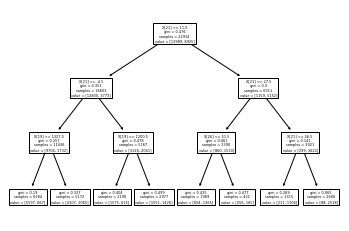

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
plot_tree(tree_clf)

from sklearn.metrics import precision_score, recall_score, mean_squared_error, roc_auc_score
import sklearn.metrics as metrics

y_probs = tree_clf.predict_proba(X_test)[:, 1]
y_pred = tree_clf.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('mean squared error:', mean_squared_error(y_test, y_pred))
print ('roc auc:', roc_auc_score(y_test, y_probs))
print ('confusion matrix:', confusion_matrix(y_test, y_pred))

## depth of the tree

Accuracy: 0.7924854902759393
Precision: 0.7716125076640098
Recall: 0.6606299212598425
mean squared error: 0.2075145097240607
roc auc: 0.8394760742662949
confusion matrix: [[5266  745]
 [1293 2517]]


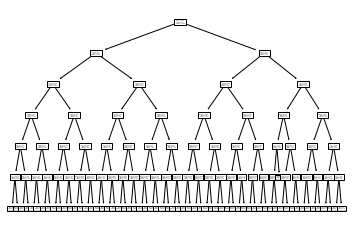

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
tree_clf1 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf1.fit(X_train, y_train)
plot_tree(tree_clf1)

y_probs1 = tree_clf.predict_proba(X_test)[:, 1]
y_pred1 = tree_clf1.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred1))
print ('Precision:', precision_score(y_test, y_pred1))
print ('Recall:', recall_score(y_test, y_pred1))
print ('mean squared error:', mean_squared_error(y_test, y_pred1))
print ('roc auc:', roc_auc_score(y_test, y_probs1))
print ('confusion matrix:', confusion_matrix(y_test, y_pred1))

## splitting criteria 

Accuracy: 0.7892271662763466
Precision: 0.8422535211267606
Recall: 0.5550251922566959
mean squared error: 0.2107728337236534
roc auc: 0.837407159027901
confusion matrix: [[5658  392]
 [1678 2093]]


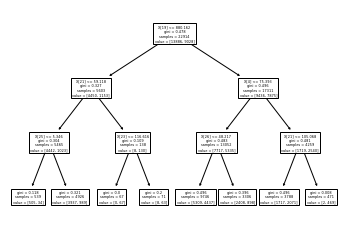

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
test_clf2 = DecisionTreeClassifier(splitter = 'random', max_depth=3, min_samples_leaf = 2, random_state=42)
test_clf2.fit(X_train, y_train)
plot_tree(test_clf2)

y_probs2 = tree_clf.predict_proba(X_test)[:, 1]
y_pred2 = tree_clf.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred2))
print ('Precision:', precision_score(y_test, y_pred2))
print ('Recall:', recall_score(y_test, y_pred2))
print ('mean squared error:', mean_squared_error(y_test, y_pred2))
print ('roc auc:', roc_auc_score(y_test, y_probs2))
print ('confusion matrix:', confusion_matrix(y_test, y_pred2))

Accuracy: 0.7914672640260666
Precision: 0.8483639265762171
Recall: 0.5603584607274644
mean squared error: 0.2085327359739334
roc auc: 0.8379911204359857
confusion matrix: [[5647  380]
 [1668 2126]]


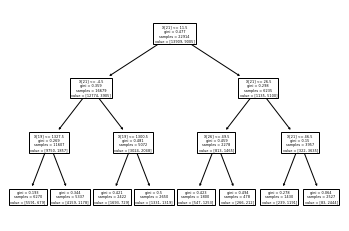

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
tree_clf5 = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 10, random_state=42)
tree_clf5.fit(X_train, y_train)
plot_tree(tree_clf5)

from sklearn.metrics import precision_score, recall_score, mean_squared_error, roc_auc_score
import sklearn.metrics as metrics

y_probs = tree_clf5.predict_proba(X_test)[:, 1]
y_pred = tree_clf5.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('mean squared error:', mean_squared_error(y_test, y_pred))
print ('roc auc:', roc_auc_score(y_test, y_probs))
print ('confusion matrix:', confusion_matrix(y_test, y_pred))

### conclution: In my dataset, the different split, splitting criteria and depth of the tree dosnt have too much different. Accuracy all between 70 to 80%

## Make new training and testing sets, by moving 30%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.39)
tree_clf3 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf3.fit(X_train, y_train)
# plot_tree(tree_clf3);

y_probs3 = tree_clf.predict_proba(X_test)[:, 1]
y_pred3 = tree_clf3.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred3))
print ('Precision:', precision_score(y_test, y_pred3))
print ('Recall:', recall_score(y_test, y_pred3))
print ('mean squared error:', mean_squared_error(y_test, y_pred3))
print ('roc auc:', roc_auc_score(y_test, y_probs3))
print ('confusion matrix:', confusion_matrix(y_test, y_pred3))

Accuracy: 0.7922769640479361
Precision: 0.7688701359587435
Recall: 0.6631621512333199
mean squared error: 0.20772303595206393
roc auc: 0.8377690410479981
confusion matrix: [[6835  986]
 [1666 3280]]


## Make new training and testing sets, by moving 60%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.48)
tree_clf4 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf4.fit(X_train, y_train)
# plot_tree(tree_clf4)

y_probs4 = tree_clf.predict_proba(X_test)[:, 1]
y_pred4 = tree_clf4.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred4))
print ('Precision:', precision_score(y_test, y_pred4))
print ('Recall:', recall_score(y_test, y_pred4))
print ('mean squared error:', mean_squared_error(y_test, y_pred4))
print ('roc auc:', roc_auc_score(y_test, y_probs4))
print ('confusion matrix:', confusion_matrix(y_test, y_pred4))

Accuracy: 0.7903646661999618
Precision: 0.7540923303292256
Recall: 0.6769027571404986
mean squared error: 0.20963533380003818
roc auc: 0.8321611375856456
confusion matrix: [[8319 1337]
 [1957 4100]]


## Make 20% training and 80% testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
tree_clf8 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf8.fit(X_train, y_train)
# plot_tree(tree_clf4)

y_probs8 = tree_clf.predict_proba(X_test)[:, 1]
y_pred8 = tree_clf8.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred8))
print ('Precision:', precision_score(y_test, y_pred8))
print ('Recall:', recall_score(y_test, y_pred8))
print ('mean squared error:', mean_squared_error(y_test, y_pred8))
print ('roc auc:', roc_auc_score(y_test, y_probs8))
print ('confusion matrix:', confusion_matrix(y_test, y_pred8))

Accuracy: 0.7769207270505575
Precision: 0.8700282908969879
Recall: 0.508115463115949
mean squared error: 0.2230792729494425
roc auc: 0.8334410368943116
confusion matrix: [[15118   781]
 [ 5061  5228]]


# Conclution:
### When the size of the test set was increased from 30% to 80%, Accuracy increased by 1%, but Precision decreased by 4%, so I think there is no over-fitting problem in my data set. 

### At the same time, I tested using only 1,000 pieces of data and 10,000 pieces of data. There was a significant decrease in accuracy, about 15%, when 1000 pieces of data were used. However, when using 10,000 pieces of data, accuracy is not much different from using 30,000 pieces of data.

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model.fit(X_train, y_train)

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

print ("Accuracy:", metrics.accuracy_score(y_test, rf_predictions))
print ('Precision:', precision_score(y_test, rf_predictions))
print ('Recall:', recall_score(y_test, rf_predictions))
print ('mean squared error:', mean_squared_error(y_test, rf_predictions))
print ('roc auc:', roc_auc_score(y_test, rf_probs))
print ('confusion matrix:', confusion_matrix(y_test, rf_predictions))

Accuracy: 0.8031768658996029
Precision: 0.8071131047741109
Recall: 0.6542857142857142
mean squared error: 0.19682313410039712
roc auc: 0.8724473918310796
confusion matrix: [[5369  602]
 [1331 2519]]


## rf depth of the tree

Accuracy: 0.796863863150392
Precision: 0.7763198046994202
Recall: 0.6684182869153967
mean squared error: 0.203136136849608
roc auc: 0.860402003399279
confusion matrix: [[5282  733]
 [1262 2544]]


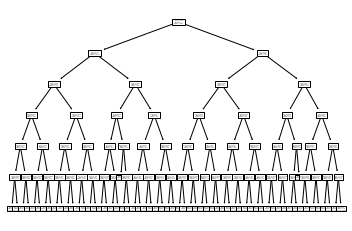

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model1 = DecisionTreeClassifier(max_depth=6, random_state=42)
model1.fit(X_train, y_train)
plot_tree(model1)

rf_probs1 = model1.predict_proba(X_test)[:, 1]
rf_pred1 = model1.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, rf_pred1))
print ('Precision:', precision_score(y_test, rf_pred1))
print ('Recall:', recall_score(y_test, rf_pred1))
print ('mean squared error:', mean_squared_error(y_test, rf_pred1))
print ('roc auc:', roc_auc_score(y_test, rf_probs1))
print ('confusion matrix:', confusion_matrix(y_test, rf_pred1))

## rf splitting criteria 

Accuracy: 0.7705936259036757
Precision: 0.7251646149441741
Recall: 0.6620491374803973
mean squared error: 0.2294063740963242
roc auc: 0.7891173250753045
confusion matrix: [[5035  960]
 [1293 2533]]


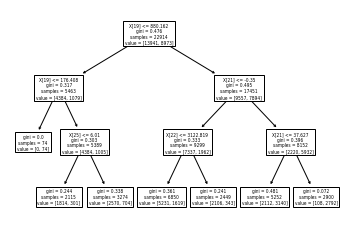

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model2 = DecisionTreeClassifier(splitter = 'random', max_depth=3, min_samples_leaf = 2, random_state=42)
model2.fit(X_train, y_train)
plot_tree(model2)

rf_probs2 = model2.predict_proba(X_test)[:, 1]
rf_pred2 = model2.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, rf_pred2))
print ('Precision:', precision_score(y_test, rf_pred2))
print ('Recall:', recall_score(y_test, rf_pred2))
print ('mean squared error:', mean_squared_error(y_test, rf_pred2))
print ('roc auc:', roc_auc_score(y_test, rf_probs2))
print ('confusion matrix:', confusion_matrix(y_test, rf_pred2))

## rf 30% test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.39)
model3 = DecisionTreeClassifier(max_depth=6, random_state=42)
model3.fit(X_train, y_train)

rf_probs3 = model3.predict_proba(X_test)[:, 1]
rf_pred3 = model3.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, rf_pred3))
print ('Precision:', precision_score(y_test, rf_pred3))
print ('Recall:', recall_score(y_test, rf_pred3))
print ('mean squared error:', mean_squared_error(y_test, rf_pred3))
print ('roc auc:', roc_auc_score(y_test, rf_probs3))
print ('confusion matrix:', confusion_matrix(y_test, rf_pred3))

Accuracy: 0.791493694681601
Precision: 0.8036588508116465
Recall: 0.6214385335724247
mean squared error: 0.208506305318399
roc auc: 0.8567104142102036
confusion matrix: [[6986  762]
 [1900 3119]]


## rf 60% test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.48)
model4 = DecisionTreeClassifier(max_depth=6, random_state=42)
model4.fit(X_train, y_train)

rf_probs4 = model4.predict_proba(X_test)[:, 1]
rf_pred4 = model4.predict(X_test)

print ("Accuracy:", metrics.accuracy_score(y_test, rf_pred4))
print ('Precision:', precision_score(y_test, rf_pred4))
print ('Recall:', recall_score(y_test, rf_pred4))
print ('mean squared error:', mean_squared_error(y_test, rf_pred4))
print ('roc auc:', roc_auc_score(y_test, rf_probs4))
print ('confusion matrix:', confusion_matrix(y_test, rf_pred4))

Accuracy: 0.793610386304334
Precision: 0.7546212395795578
Recall: 0.6879233437964646
mean squared error: 0.206389613695666
roc auc: 0.8573618765774649
confusion matrix: [[8306 1354]
 [1889 4164]]


## conclution:
### Every metric improves when using random forest